In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl

# MATHMOD:LAB1 | Task

In [2]:
# observation data
obs = np.array([
    0.024, 11.7, 
    0.038, 12.7, 
    0.04, 15.5, 
    0.045, 16.8, 
    0.047, 16.7, 
    0.0578, 17.5, 
    0.0629, 18.5, 
    0.0629, 18.7, 
    0.063, 18.8, 
    0.064, 19.5, 
    0.0678, 20.8, 
    0.0691, 20.3, 
    0.071, 23.3, 
    0.0742, 23.2, 
    0.0752, 23.7, 
    0.077, 24.4, 
    0.0779, 28.9, 
    0.0781, 25.8, 
    0.0787, 29.5, 
    0.0789, 23.3, 
    0.0791, 22.5, 
    0.0862, 26.2, 
    0.0867, 29.7, 
    0.0877, 33.8, 
    0.089, 35, 
    0.0897, 32, 
    0.096, 40, 
    0.098, 41, 
    0.099, 43.8
]).reshape(-1,2)

X = obs[:,0]
Y = obs[:,1]
obs.shape, X.shape

((29, 2), (29,))

### Utilities

In [3]:
# Functions:

def corr2(A,B):
    A = A-A.mean()
    B = B-B.mean()
    return (A*B).sum()**2 / ((A*A).sum() * (B*B).sum())

def r2(X,Y,Ypred):
    return 1 - ((Y-Ypred)**2).sum() / ((Y-Y.mean())**2).sum()

# Predictors:

def Mlin(w):
    def f(x): return w[1] + w[0]*x
    return f

def Mpoly2(w):
    def f(x): return w[2] + w[1]*x + w[0]*x*x
    return f

def Mlog(w):
    def f(x): return w[1] + w[0]*np.log(x)
    return f

def Mexp(w):
    def f(x): return w[1] * np.exp(w[0] * x)
    return f

DIGITS = 10

### Data at first glance (graph + descriptive statistics)

In [4]:
r = np.sqrt(corr2(X, Y))
print(r)
if r>0.8: print("Possible linear dependance")

0.9055795650478515
Possible linear dependance


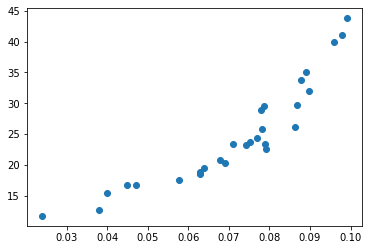

In [5]:
plt.scatter(X,Y)

- Схожий на експоненту зріст
- Може гарно підійти поліноміальна ф-ція

## Linear, Polynomial and Log Regression

Consider
$$
A_{lin} = \begin{pmatrix} 
x_0 & 1 \\
x_1 & 1 \\
... \\
x_n & 1
\end{pmatrix}\quad
A_{poly2} = \begin{pmatrix} 
x_0^2 & x_0 & 1 \\
x_1^2 & x_1 & 1 \\
... \\
x_n^2 & x_n & 1
\end{pmatrix}\quad
A_{log} = \begin{pmatrix} 
\log(x_0) & 1 \\
\log(x_1) & 1 \\
... \\
\log(x_n) & 1
\end{pmatrix}\quad
$$
and weights / coefs $w = \begin{pmatrix} w_0 \\ w_1 \end{pmatrix}$ or $w = \begin{pmatrix} w_0 \\ w_1 \\ w_2 \end{pmatrix}$ 

We want to find such $w$ so error $\|\operatorname A w - Y_{obs}\|^2$ is minimal => $\nabla = 0$

## Exponential regression

Model is $$f(x) = a \cdot b ^ x  = \omega_0 \cdot \exp (\omega_1 \cdot x)$$

This is not a multilinear model. **But**, we can make it linear using log-scale:
$$ \log y = \log f(x) = \log (\omega_0 \cdot \exp (\omega_1 \cdot x)) = \log \omega_0 + \log (\exp (\omega_1 \cdot x))$$
$$ \log y = \log \omega_0 + \omega_1 \cdot x $$
$$ \log y = \omega_0' + \omega_1 \cdot x $$
where $\omega_0 = e^{\omega_0'}$

That is, we can write $A_{exp}$ and one more regression equation for this new problem:
$$A_{exp} = \begin{pmatrix}
1 & x_0 \\
1 & x_1 \\
...\\
1 & x_n
\end{pmatrix}$$
And
$$
\log y = z = A_{exp} \cdot (\omega_0' , \omega_1)^T 
$$

## General method
We are doing a **multilinear regression** where $A_{ij}$ is a value of the j-th variable in the i-th observation 

There is a well known method of finding best weights for **ordinary least squares**:

$$
w = (A^T A)^{-1} A^T y
$$

All we need to do is evaluate this expression for every $A$, build corresponding model and grade 

#### Note for exponential regression:
$$
w_{exp} = (A_{exp}^T A_{exp})^{-1} A_{exp}^T \log(y)
$$

### 0. Preparing 4 $A$ matrices

In [6]:
Alin = np.array([X, np.ones_like(X)]).T
Apoly2 = np.array([X*X, X, np.ones_like(X)]).T
Aexp = np.array([X, np.ones_like(X)]).T
Alog = np.array([np.log(X), np.ones_like(X)]).T

As = [Alin, Apoly2, Alog]
for i in As: print(i.shape)
print(Aexp.shape)

(29, 2)
(29, 3)
(29, 2)
(29, 2)


### 1. Calculating 4 weights vectors
using $w = (A^T A)^{-1} A^T y$ for each $A$

In [7]:
Ws = [la.inv(A.T @ A) @ A.T @ Y for A in As]
Wexp = la.inv(Aexp.T @ Aexp) @ Aexp.T @ np.log(Y)
Wexp[1] = np.exp(Wexp[1])

print("Lin fit: ",Ws[0][1],"+",Ws[0][0],"x")
print("Poly2 fit: ",Ws[1][2],"+",Ws[1][1],"x +",Ws[1][0],"x^2")
print("Exp fit: ",Wexp[1],"* (",np.exp(Wexp[0]),") ^ x")
print("Lin fit: ",Ws[2][1],"+",Ws[2][0],"log(x)")

Lin fit:  -3.940704950851397 + 401.1243003898881 x
Poly2 fit:  22.061646556013976 + -481.8427892008863 x + 6815.430488195347 x^2
Exp fit:  6.929284452557184 * ( 25448819.640675373 ) ^ x
Lin fit:  81.69547774237877 + 21.25373940650688 log(x)


### 2. Model compilation and analysis

lin : r^2 = 0.820074348632256 
poly : r^2 = 0.9381488875142406  - success
exp : r^2 = 0.9021138514235943  - success
log : r^2 = 0.6822155002045898 


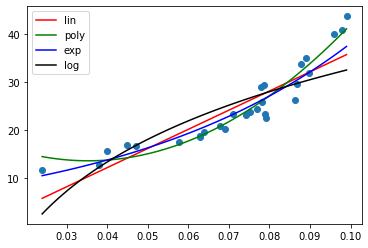

In [8]:
Ms = [Mlin(Ws[0]), Mpoly2(Ws[1]), Mexp(Wexp), Mlog(Ws[2])]
label = ["lin", "poly", "exp", "log"]
c = ['r','g','b','k']
xspace = np.linspace(X.min(), X.max(), 100)

plt.scatter(X,Y)
for i in range(0,4):
    plt.plot(xspace, Ms[i](xspace), label=label[i], c=c[i])
    r = r2(X,Y,Ms[i](X))
    print(label[i], ": r^2 =", r, " - success" if r > 0.85 else "")
plt.legend()

### 3. Results

- **2-nd degree polynomial** appears to be the best fit with **r^2 = 0.94**;
- Exponent fit is applicable as r^2 = 0.9; but not as good as poly2; 
- Linear fit is kinda bad, but may be okay in some range of xs
- Logarithm is the worst